# Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [ ]:
# You might want to use the following package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# step 1. load the data

def loadHousingData(housing_csv):
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv(housing_csv)
  return housing

# call the function to load your dataset here
housing  = loadHousingData("housing.csv")
# display the first ten rows of the data for a check
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
# provide a quick summary of data w/ features, count, and types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# provide some basic statistics about the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


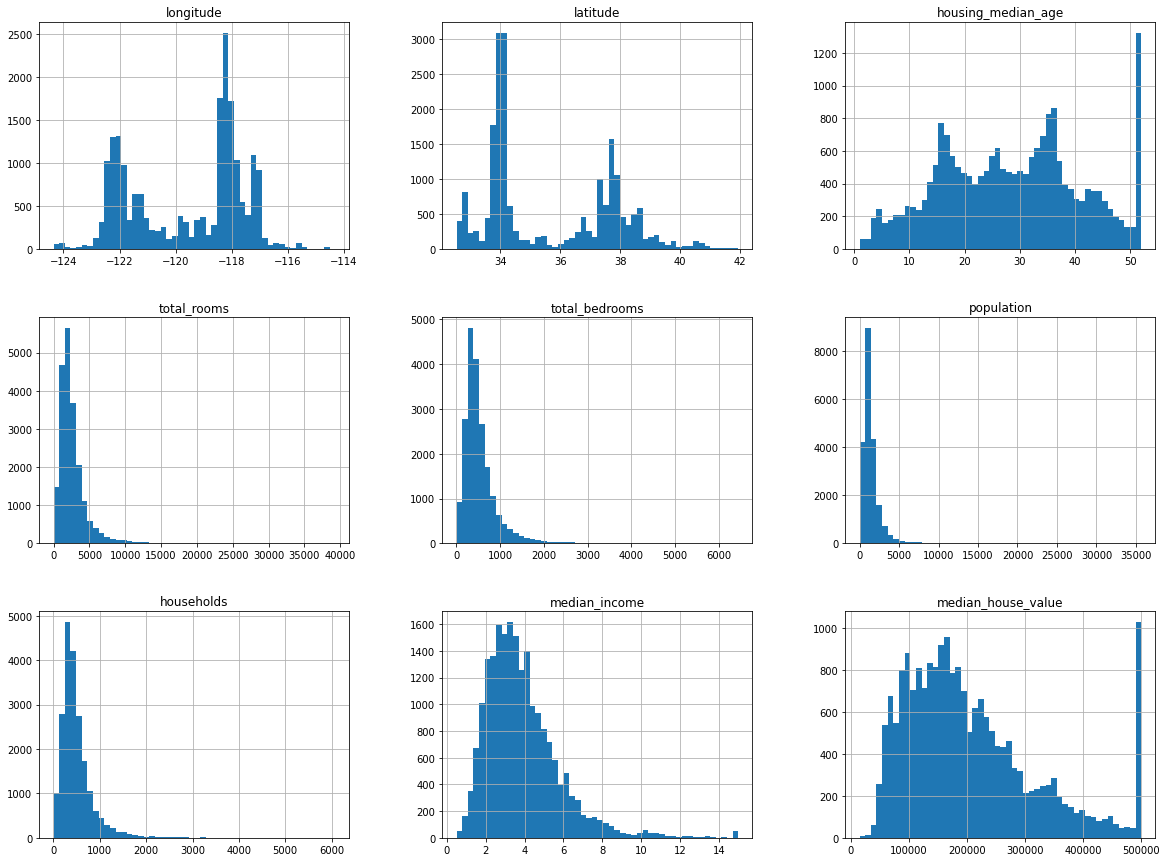

In [ ]:
# step 2. data visualization
housing.hist(bins=50, figsize=(20,15))
plt.show()

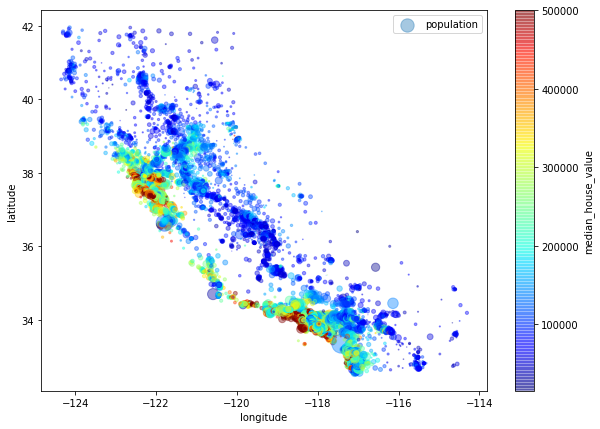

In [ ]:
# Incorporate the population into the circle size
# Add color (jet map) for the value of the housing
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97698160d0>,
      dtype=object)

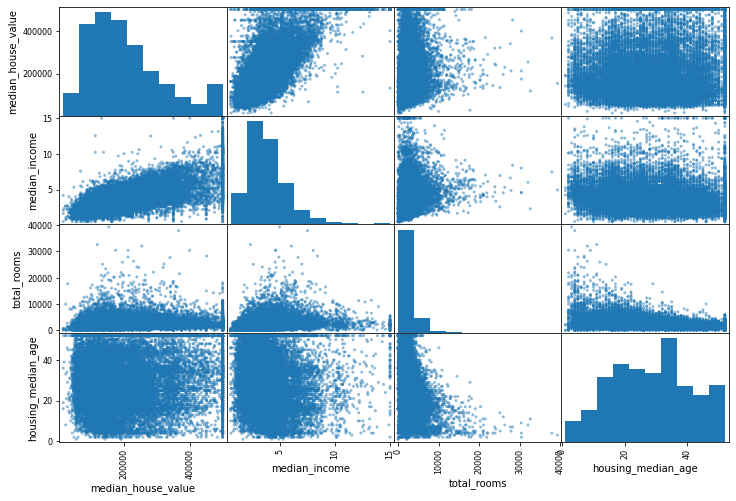

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

housing_num = housing.select_dtypes(include=[np.number])
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [ ]:
''' Function: K Means
 -------------
 K-Means is an algorithm that takes in a dataset and a constant
 k and returns k centroids (which define clusters of data in the
 dataset which are similar to one another). 
 '''
class KMeans:

  def __init__(self):
    """
    initialize the K-means algorithm
    """
    self.k = 3  # cluster count
    self.p = 1  # distance measure metric

  def initializeRandomCentroids(self, k, p, data):
    """
    initialize k cluster centroids (centers)
    initially, we'll take k random points in the data
    in our case, a centroid is the average of all data in a cluster
    params:
      k: # of cluster centers
      data: prepared california housing data
    return: 
      centroids: array of centroids
    """
    # initalize centroids of size (k, number of features)
    centroids = np.zeros((k, len(data[0])), dtype=float)

    # initialize k random data points as centroids
    for i in range(k):
      k_center = data[np.random.choice(range(len(data[0])))]
      centroids[i] = k_center

    return k, centroids

  def distanceMeasure(self, p, point, centroid):
    """
    implementation of distance measures metrics
  
    params:
      p: distance metric (mahattan, euclidean, or sup distance)
      point: data point within data set
      centroid: centroid value from centroid array

    returns: 
      distance of a given point
    """
    root = float(1/p)  # root value (float) for sup distance

    # calculate minkovski distance for a given point

    # manhattan
    if p == 1:
      distance = np.sum(np.abs(point - centroid), axis=1)
    
    # euclidean
    elif p == 2:
      distance = np.sqrt(np.sum(np.abs((point - centroid))**2, axis=1))

    # sup distance
    else: 
      maximum_distance = []
      for i in range(len(centroid)):
        for j in range(len(point)):
          maximum_distance.append(np.abs(point[j] - centroid[i][j]))
      distance = max(maximum_distance)

    return distance

  def kMeans(self, k, p, data, iters):
    """
    implementation of k-means algorithm

    params:
      k: number of clusters
      p: distance metric (mahattan, euclidean, or sup distance)
      data: data set to be clustered
      iters: max number of iterations (avoids infinite while loop)

    returns: 
      
    """
    iterations = 0  # start the clock at zero iterations for while loop
    previous_centroids = None  # avoids any potential errors with recalculateCentroids

    # first, initialize random centroids
    self.k, centroids = myKMeans.initializeRandomCentroids(k, p, data)

    while np.not_equal(centroids, previous_centroids).any() and iterations <= iters:
      # establish clusters to sort data into (initial size: (k, ))
      points = [[] for _ in range(len(centroids))]
      
      # for each data point, calculate distance with minkovski distance method
      for i in data:
        distance = myKMeans.distanceMeasure(p, i, centroids)

        # find index of best centroid (smallest distance between point and centroid)
        best_centroid = np.argmin(distance)

        # assign data point to best centroid option
        points[best_centroid].append(i)

      centroids, previous_centroids = myKMeans.recalculateCentroids(centroids, points)
      clusters = points
      iterations += 1

    return centroids, clusters
  
  def recalculateCentroids(self, centroids, points):
    """
    recalcualte centroids as an average of all data points in one cluster
  
    params:
      k: number of clusters
      data: full data set
      centroids: array of last-used centroids for comparison

    returns: 
      new_centroids: recalculated centroids (mean of all datapoints in a cluster)
    """
    # initalize new_centroids of size (k, number of features)
    previous_centroids = centroids

    # reestablish centroid values as the mean of all datapoints in a cluster
    centroids = [np.mean(cluster, axis=0) for cluster in points]

    # catch any centroids that have no points (np.nans) just in case :)
    for i in range(len(centroids)):
      centroid = centroids[i]
      if np.isnan(centroid).any():
        centroids[i] = previous_centroids[i]

    return centroids, previous_centroids

  def sse(self, k, clusters):
    """
    calculate sum of squared error for clusters
  
    params:
      k: number of clusters
      clusters: array of cluster-assigned data points 

    returns: 
      sse_final: calculated sse for k
    """
    sse_distances = []
    sse_distance = 0
    
    for i in range(k):
      for j in range(len(clusters[i])):
        sse_distance = sse_distance + np.sum(np.abs(np.square(np.abs((clusters[i][j] - clusters[i])))))
      sse_distances.append(sse_distance)
    sse_final = sum(sse_distances)
          
    return sse_final

# calls the istance of class KMeans
myKMeans = KMeans()

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


sse of clusters: 4704679554.982589
cluster means: [0.5735693656677758, 0.001972961901109575]
standard deviation of clustered attributes: [array([0.98469535, 0.92113065, 0.73025648, 1.64184594, 1.50043506,
       1.62171153, 1.47576676, 0.93169865, 0.92806421, 0.49950119,
       0.46850877, 0.        , 0.27396581, 0.31930082]), array([0.99928954, 1.00791513, 0.97234199, 0.45782775, 0.47618593,
       0.51209977, 0.48361661, 1.00717923, 1.00798217, 0.49611476,
       0.46502821, 0.0166036 , 0.31900996, 0.33702045])]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sse of clusters: 2907845892.0271006
cluster means: [0.7753760205347959, -8.38811843312559e-05, 0.03936581295775176]
standard deviation of clustered attributes: [array([0.97736462, 0.90995357, 0.68252604, 1.863569  , 1.67697848,
       1.88911738, 1.65439949, 0.91695022, 0.90280281, 0.49761124,
       0.48524713, 0.        , 0.25806615, 0.29681797]), array([0.49292594, 0.46833421, 1.0414079 , 0.54583965, 0.56169851,
       0.55851253, 0.58016705, 0.98025585, 1.02784111, 0.37611766,
       0.49933076, 0.        , 0.43839175, 0.29424943]), array([0.37363366, 0.26067457, 0.92569358, 0.53741657, 0.57657658,
       0.60982151, 0.57289538, 1.02022076, 0.97875769, 0.47580373,
       0.39028929, 0.02147288, 0.        , 0.36512449])]
sse of clusters: 3989588719.334896
cluster means: [-0.0291060315206479, 0.8008676094807431, 0.015827803262324646, 0.2892555281760176]
standard deviation of clustered attributes: [array([0.52696364, 0.50119264, 1.04485297, 0.53191953, 0.56928343,
       0.55991112, 0

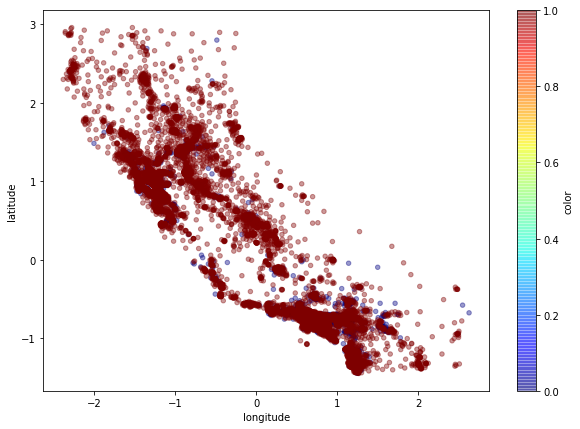

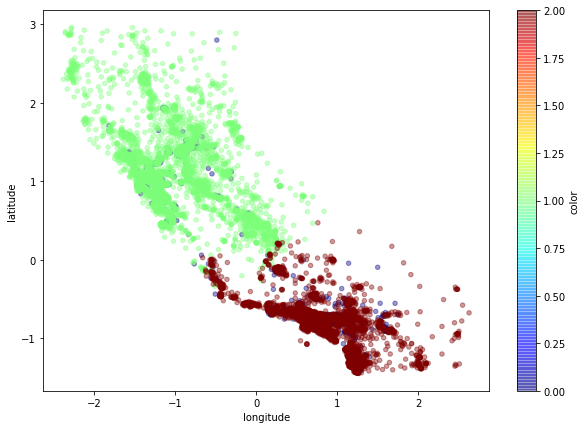

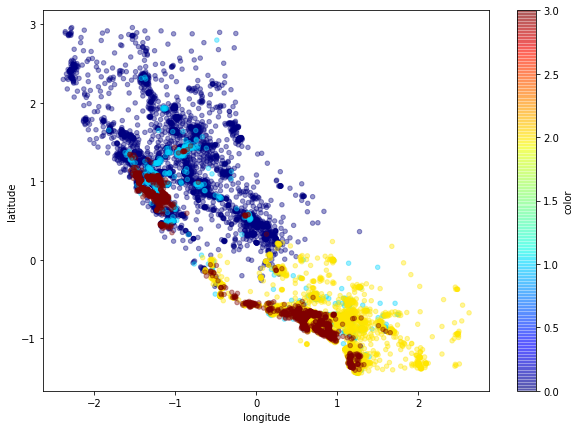

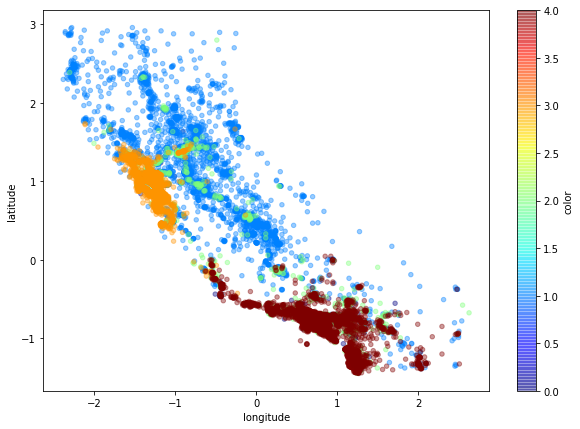

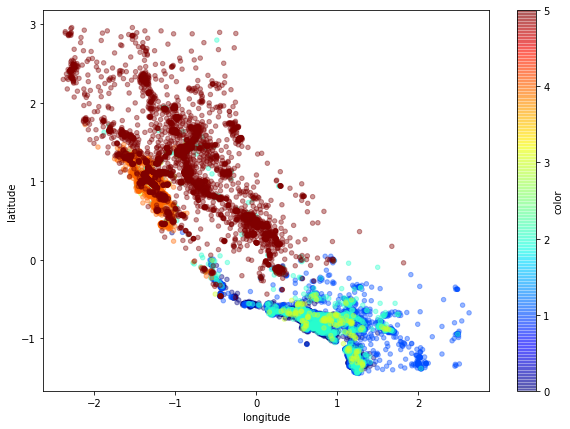

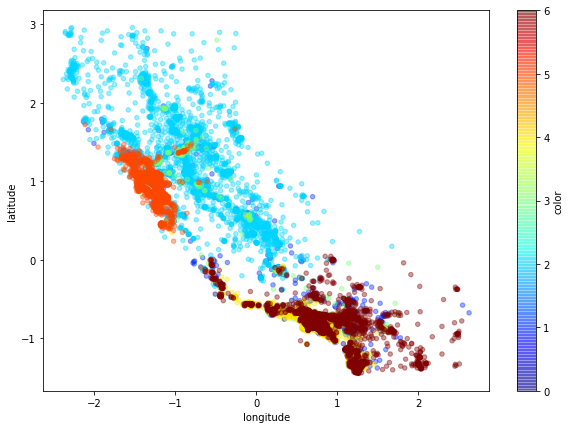

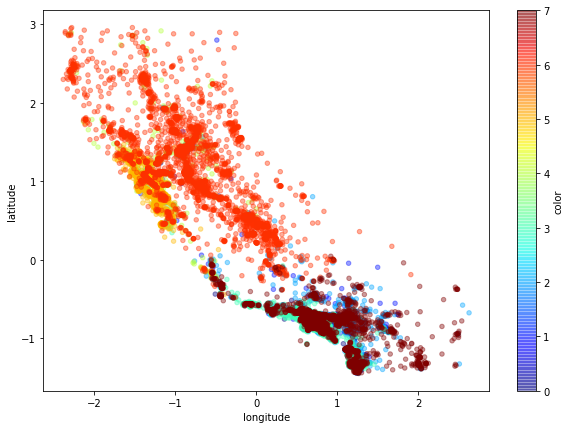

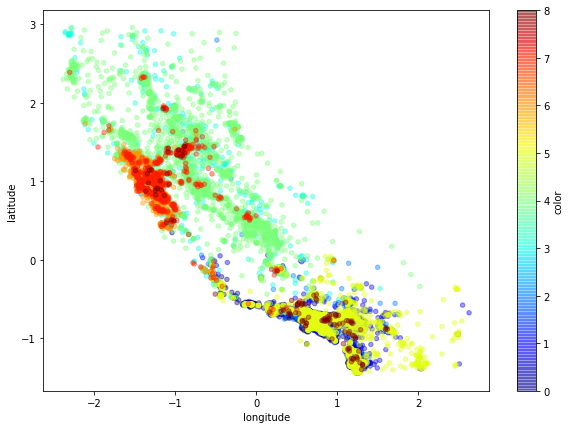

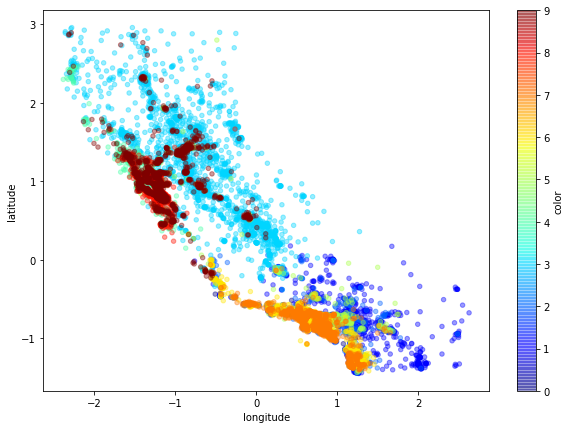

In [ ]:
# 1.0 apply k-means for k clusters, manhattan
import pandas as pd

x = []
sse_total = []
for i in range(2, 11):
  x.append(i)
  centroids, clusters = myKMeans.kMeans(i, 1, housing_prepared, 100)
  # 1.1 report the sse, cluster means, cluster std dev for each attribute

  # 1.1.1 sse
  sse_final = myKMeans.sse(i, clusters)
  sse_total.append(sse_final)
  print('sse of clusters:', sse_final)
  
  # 1.1.2 mean
  means = []
  for i in range(len(centroids)):
    means.append(np.mean(clusters[i]))
  print('cluster means:', means)

  # 1.1.3 std dev
  stdev = []
  for i in range(len(centroids)):
    stdev.append(np.std(clusters[i], axis=0))
  print('standard deviation of clustered attributes:', stdev)

  # 1.2 plot long vs. lat
  # label housing labels in a dataframe so we can 
  # 1. plot longitude vs latitude 
  # 2. plot each cluster as a new color
  housing_df = pd.DataFrame(columns = ["longitude", "latitude", "housing_median_age", 
                                      "total_rooms", "total_bedrooms", "population", 
                                      "households", "median_income", 
                                      "median_bouse_value", "ocean_proximity", 
                                      "ocean_proximity", "ocean_proximity",
                                      "ocean_proximity", "color"])
  for i in range(len(centroids)):
    temp_df = pd.DataFrame(clusters[i], columns = ["longitude", "latitude", "housing_median_age", 
                                      "total_rooms", "total_bedrooms", "population", 
                                      "households", "median_income", 
                                      "median_bouse_value", "ocean_proximity", 
                                      "ocean_proximity", "ocean_proximity",
                                      "ocean_proximity", "color"])
    temp_df["color"] = i
    housing_df = housing_df.append(temp_df)
  housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                figsize=(10,7), c="color", cmap=plt.get_cmap("jet"), colorbar=True,
                sharex=False)


Text(0, 0.5, 'sse')

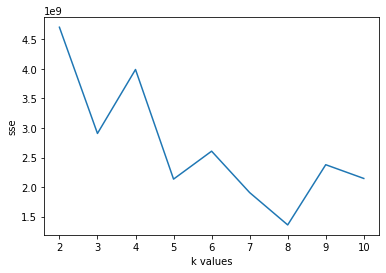

In [ ]:
# plot elbow graph for manhattan
plt.plot(x, sse_total)
plt.xlabel('k values')
plt.ylabel('sse')

sse of clusters: 8967278317.033508
cluster means: [0.003392467352072653, 0.5882592679097238]
standard deviation of clustered attributes: [array([0.99971554, 1.00737796, 0.97256827, 0.46249898, 0.48181234,
       0.51285455, 0.48961594, 1.00540341, 1.00697825, 0.49615697,
       0.46500995, 0.01655484, 0.31872495, 0.33696157]), array([0.98257634, 0.92339224, 0.73624391, 1.65866027, 1.51112953,
       1.64279126, 1.48751719, 0.94256117, 0.93337707, 0.49946539,
       0.46878961, 0.        , 0.27443958, 0.31896413])]
sse of clusters: 2837281033.2954407
cluster means: [0.7035598741468034, -0.005507979912858198, 0.03072078798956439]
standard deviation of clustered attributes: [array([0.97492248, 0.90490986, 0.71838143, 1.78557175, 1.60893636,
       1.78483234, 1.5801808 , 0.94352767, 0.94208559, 0.49877205,
       0.47721876, 0.        , 0.27317919, 0.30396119]), array([0.493627  , 0.47339572, 1.04203948, 0.51986218, 0.53530057,
       0.52979332, 0.55094983, 0.97988125, 1.0245868 , 0.3774

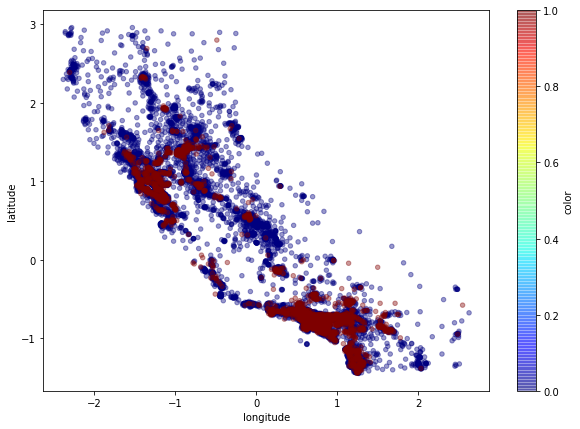

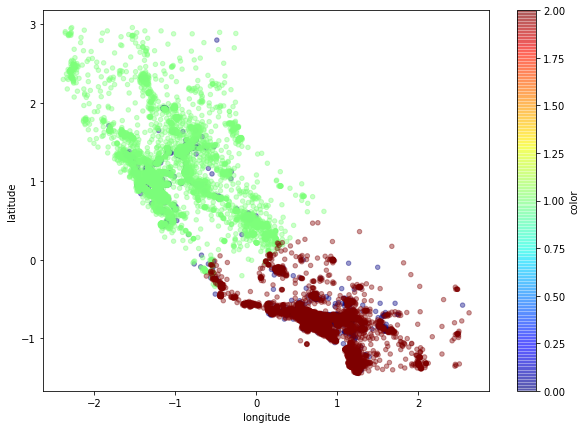

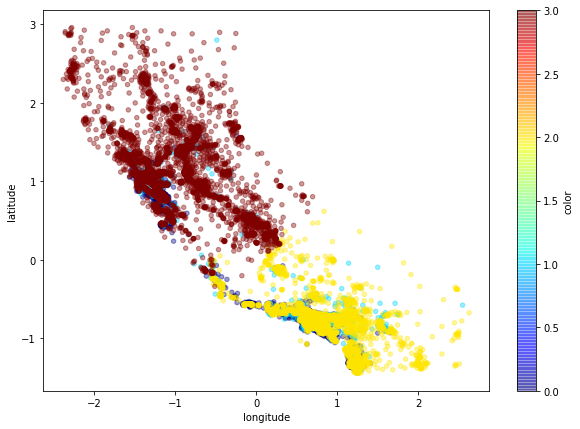

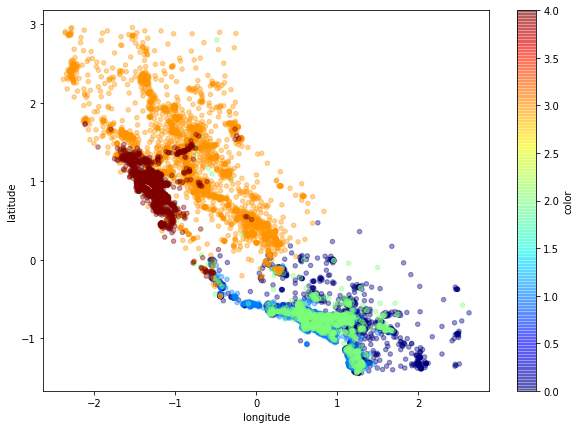

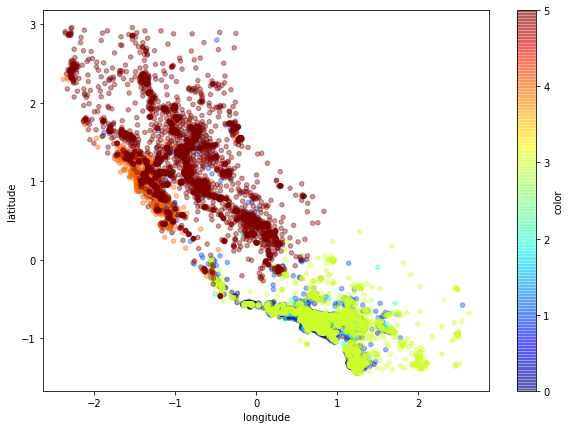

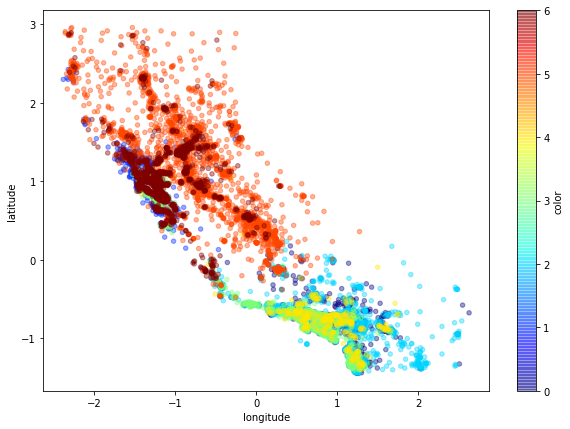

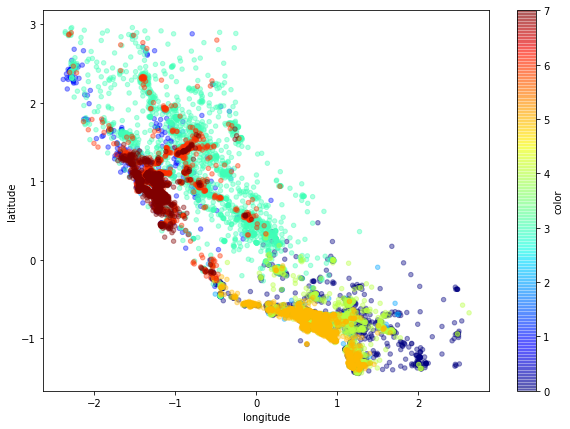

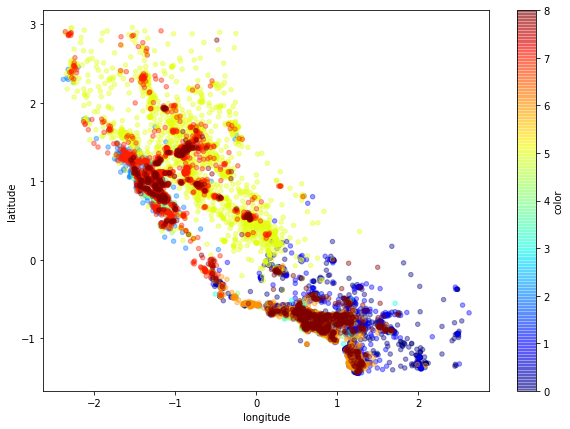

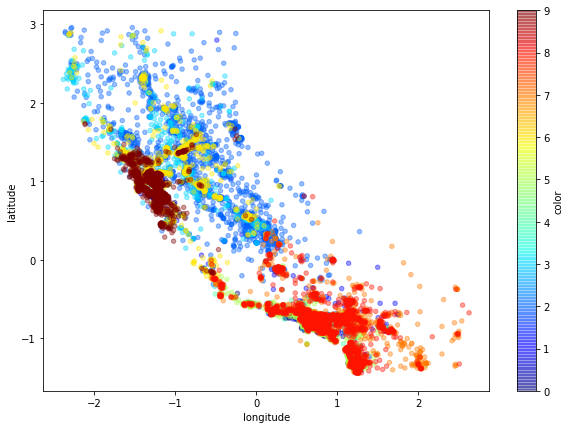

In [ ]:
# 2.0 apply k-means for k clusters, eucleudian
import pandas as pd

x = []
sse_total = []
for i in range(2, 11):
  x.append(i)
  centroids, clusters = myKMeans.kMeans(i, 2, housing_prepared, 100)
  # 2.1 report the sse, cluster means, cluster std dev for each attribute

  # 2.1.1 sse
  sse_final = myKMeans.sse(i, clusters)
  sse_total.append(sse_final)
  print('sse of clusters:', sse_final)
  
  # 2.1.2 mean
  means = []
  for i in range(len(centroids)):
    means.append(np.mean(clusters[i]))
  print('cluster means:', means)

  # 2.1.3 std dev
  stdev = []
  for i in range(len(centroids)):
    stdev.append(np.std(clusters[i], axis=0))
  print('standard deviation of clustered attributes:', stdev)

  # 2.2 plot long vs. lat
  # label housing labels in a dataframe so we can 
  # 1. plot longitude vs latitude 
  # 2. plot each cluster as a new color
  housing_df = pd.DataFrame(columns = ["longitude", "latitude", "housing_median_age", 
                                      "total_rooms", "total_bedrooms", "population", 
                                      "households", "median_income", 
                                      "median_bouse_value", "ocean_proximity", 
                                      "ocean_proximity", "ocean_proximity",
                                      "ocean_proximity", "color"])
  for i in range(len(centroids)):
    temp_df = pd.DataFrame(clusters[i], columns = ["longitude", "latitude", "housing_median_age", 
                                      "total_rooms", "total_bedrooms", "population", 
                                      "households", "median_income", 
                                      "median_bouse_value", "ocean_proximity", 
                                      "ocean_proximity", "ocean_proximity",
                                      "ocean_proximity", "color"])
    temp_df["color"] = i
    housing_df = housing_df.append(temp_df)
  housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                figsize=(10,7), c="color", cmap=plt.get_cmap("jet"), colorbar=True,
                sharex=False)

Text(0, 0.5, 'sse')

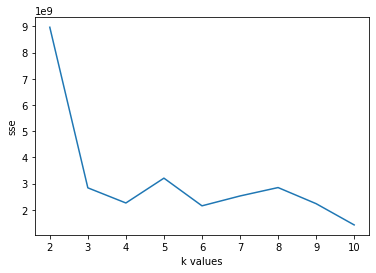

In [ ]:
# plot elbow graph for euclidean
plt.plot(x, sse_total)
plt.xlabel('k values')
plt.ylabel('sse')

In [ ]:
# 3.0 apply k-means for k clusters, sup
import pandas as pd

x = []
sse_total = []
for i in range(2, 11):
  x.append(i)
  centroids, clusters = myKMeans.kMeans(i, 2, housing_prepared, 100)
  # 3.1 report the sse, cluster means, cluster std dev for each attribute

  # 3.1.1 sse
  sse_final = myKMeans.sse(i, clusters)
  sse_total.append(sse_final)
  print('sse of clusters:', sse_final)
  
  # 3.1.2 mean
  means = []
  for i in range(len(centroids)):
    means.append(np.mean(clusters[i]))
  print('cluster means:', means)

  # 3.1.3 std dev
  stdev = []
  for i in range(len(centroids)):
    stdev.append(np.std(clusters[i], axis=0))
  print('standard deviation of clustered attributes:', stdev)

  # 3.2 plot long vs. lat
  # label housing labels in a dataframe so we can 
  # 1. plot longitude vs latitude 
  # 2. plot each cluster as a new color
  housing_df = pd.DataFrame(columns = ["longitude", "latitude", "housing_median_age", 
                                      "total_rooms", "total_bedrooms", "population", 
                                      "households", "median_income", 
                                      "median_bouse_value", "ocean_proximity", 
                                      "ocean_proximity", "ocean_proximity",
                                      "ocean_proximity", "color"])
  for i in range(len(centroids)):
    temp_df = pd.DataFrame(clusters[i], columns = ["longitude", "latitude", "housing_median_age", 
                                      "total_rooms", "total_bedrooms", "population", 
                                      "households", "median_income", 
                                      "median_bouse_value", "ocean_proximity", 
                                      "ocean_proximity", "ocean_proximity",
                                      "ocean_proximity", "color"])
    temp_df["color"] = i
    housing_df = housing_df.append(temp_df)
  housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                figsize=(10,7), c="color", cmap=plt.get_cmap("jet"), colorbar=True,
                sharex=False)

NameError: ignored

**Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found?** <br>
I found that the clusters were fairly represented of the data because the cluster means were around 1.0 and the standard deviations were around 1.0. <br><br>

**How do they compare with what you know about cities and areas in California?** 
<br>
The clusters successfully highlight urban (more expensive) areas like San Francisco in separate clusters than more rural areas (like Yosemite National Park).
<br><br>
**What can you attribute the gaps to?** <br>
The gaps are geological features that are unlivable (like mountains, deserts). 
<br><br>

**When you change k, do any additional patterns emerge?**
<br>
There is a greater divide between urban areas (like SF, LA) and suburban or rural areas. **Additionally, as k increases, sse decreases.**
<br><br>
**Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc.**
<br> 10 clusters does highlight two different clusters in the Bay Area, although they appear on top of each other, so it's relatively clear.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



Initially, when you plot "median_house_value" (in step 1), the Bay Area and the Los Angeles area cluster as the highest median house values in California. As k-number of clusters increase, California begins to cluster into regional areas, with the Bay Area and LA as individual clusters compared to the rest of California. <br><br>

The Bay Area and LA area are the most expensive areas to live in California. However, they tend to be the most temperate. Thus, there is a obviously a greater crisis in these two areas because people experiencing unhoused situations will move to these cities for the weather (and also because they have higher populations, thus more options to receive assistance). I found that using 9 clusters with p=any value showed the two areas clearly as well as specific locations in those areas (while also showing that Sacramento also as a separate cluster). There are a few rural areas that cluster as one large group (like the rural area of Northern CA). One solution to the California Housing Crisis is to incentized people to move to this area. If people disperse to a more equal distribution, cities/towns may have better resources to help those facing housing insecurities. 